<a href="https://colab.research.google.com/github/Jaiaggarwaaaaal/Amb-Tracer/blob/master/magic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install imblearn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib is use for the visual animated visualisation and all
from sklearn.preprocessing import StandardScaler
#removing the mean and scaling to unit variance.
from imblearn.over_sampling import RandomOverSampler
#it randomly duplicates instances from the minority class(es) until the class distribution is balanced.

In [10]:
!unzip "/content/magic+gamma+telescope.zip"

Archive:  /content/magic+gamma+telescope.zip
  inflating: magic04.data            
  inflating: magic04.names           


In [11]:
cols = ["flength" , " fwidth" , "fsize" , "fconc" , "fconcl" , "fasym" , "fm3long" , "fm3trans" , "falpha", "fdist" , "class"]
df = pd.read_csv("magic04.data", names = cols)


In [12]:
df['class'] = (df['class'] == 'g').astype(int)

In [13]:
df.head()

,flength,fwidth,fsize,fconc,fconcl,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color = 'blue' , label = 'gamma' , alpha =0.7, density= True)
  plt.hist(df[df['class']==0][label], color = 'red' , label = 'gv' , alpha =0.7, density= True)
  plt.title(label)
  plt.ylabel("probability ")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, validation, datasets


In [15]:
train, valid, test = np.split(df.sample(frac=1), [int (0.6*len(df)), int(0.8*len(df))])
#df.sample(frac=1) is used to make the data randomised before the spliting
#Here the data is shuffle the code is divided into training data, supervised data, test data
#training data(60), supervised data(20), test data(20)

In [16]:
def scale_dataset(dataframe, oversample=True):
  x = dataframe[dataframe.columns[:-1]].values
  #the last column is not taking because the last column is output

  y = dataframe[dataframe.columns[-1]].values


  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

# used to stack the data in the horizantal array
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x , y


In [17]:
train = pd.DataFrame(train)
valid = pd.DataFrame(valid)
test = pd.DataFrame(test)

In [18]:
#print(type(train))

In [19]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)


#KNN


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model =KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn_model.predict(x_test)

In [ ]:
#y_pred

In [ ]:
#y_test

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1326
           1       0.84      0.90      0.87      2478

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.79      3804
weighted avg       0.82      0.82      0.82      3804



In [20]:

#The Maximum a Posteriori (MAP) estimation is a method used in Bayesian statistics to
#estimate the most probable value of a parameter given the observed data.

#Naive bayes


In [24]:
from sklearn.naive_bayes import GaussianNB


In [25]:
nb_model  = GaussianNB()
nb_model= nb_model.fit(x_train, y_train)


In [26]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1326
           1       0.74      0.89      0.81      2478

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

#SVM


In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [31]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1326
           1       0.89      0.90      0.90      2478

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#neural network

In [32]:
import tensorflow as tf

In [33]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [34]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

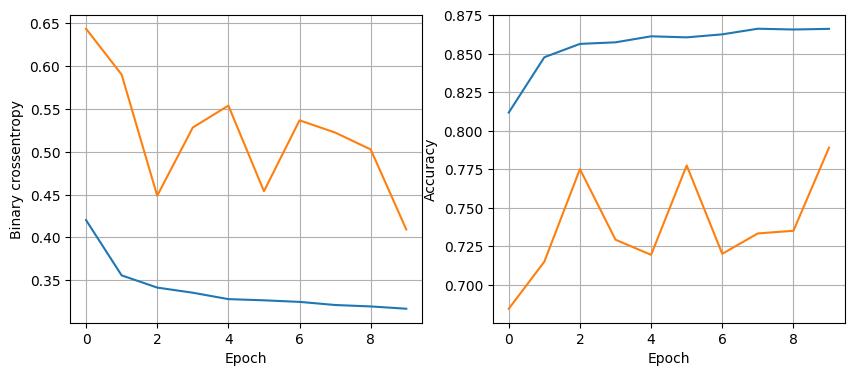

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8693
16 nodes, dropout 0, lr 0.01, batch size 128


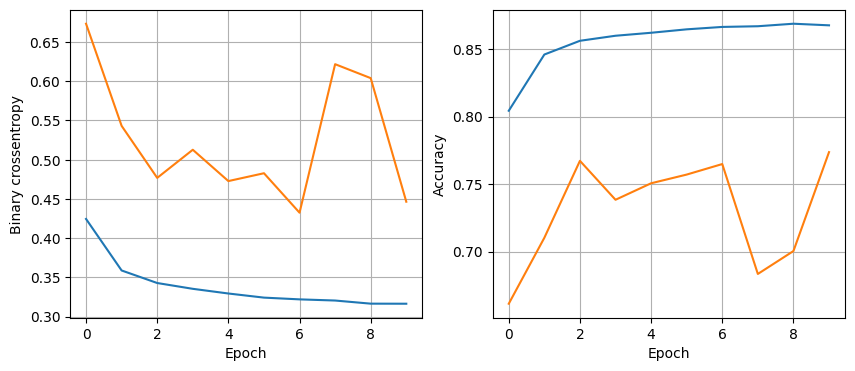

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.005, batch size 32


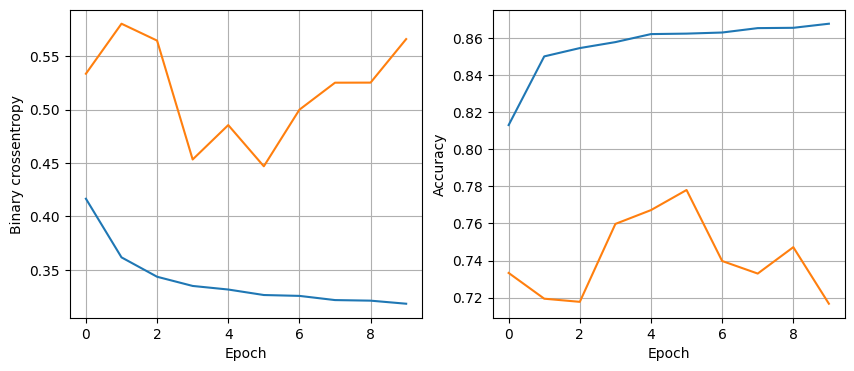

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.005, batch size 64


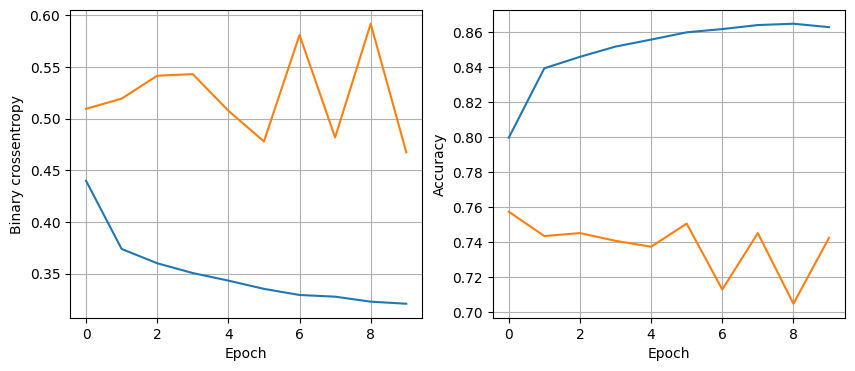

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.005, batch size 128


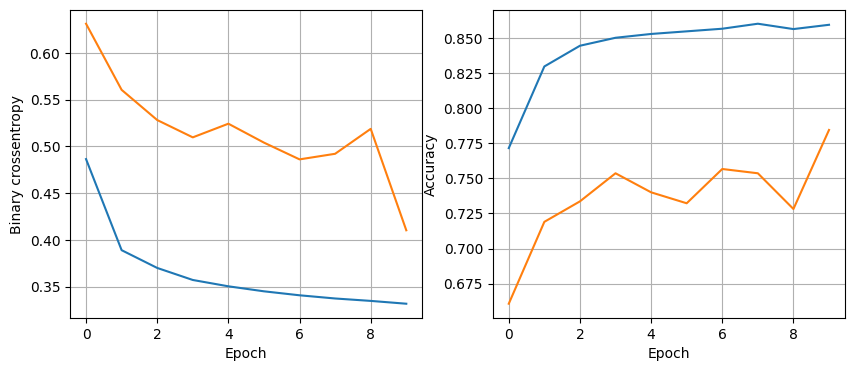

119/119 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8609
16 nodes, dropout 0, lr 0.001, batch size 32


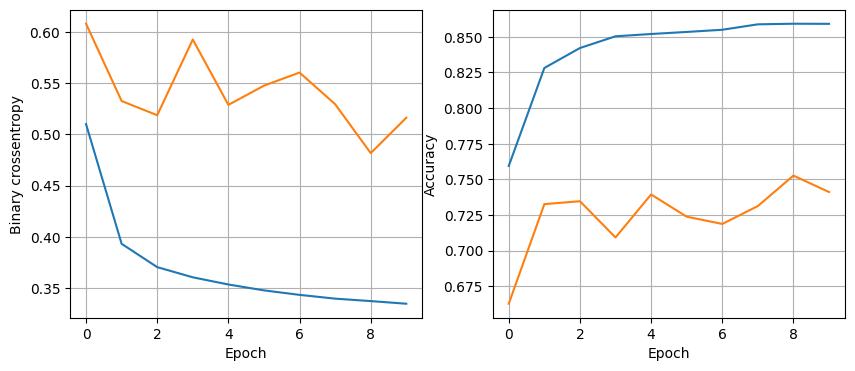

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.001, batch size 64


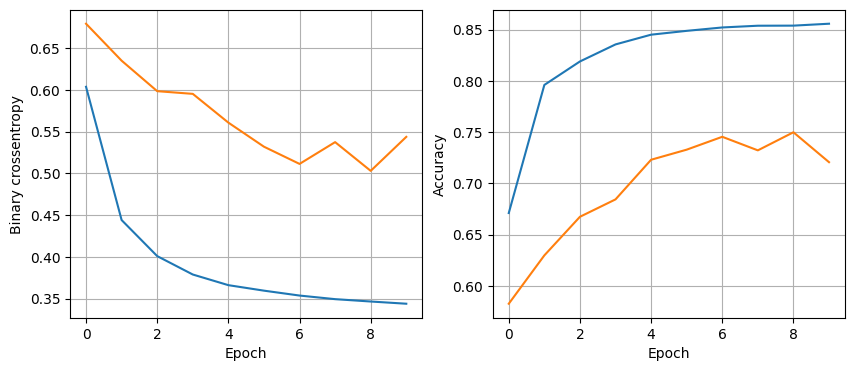

119/119 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.001, batch size 128


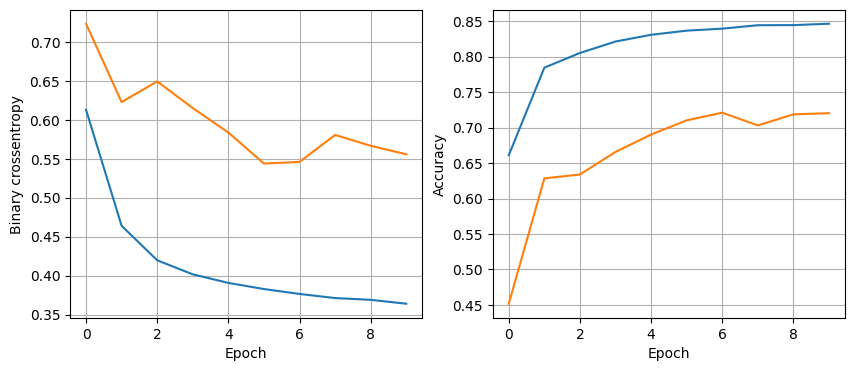

119/119 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8507
16 nodes, dropout 0.2, lr 0.01, batch size 32


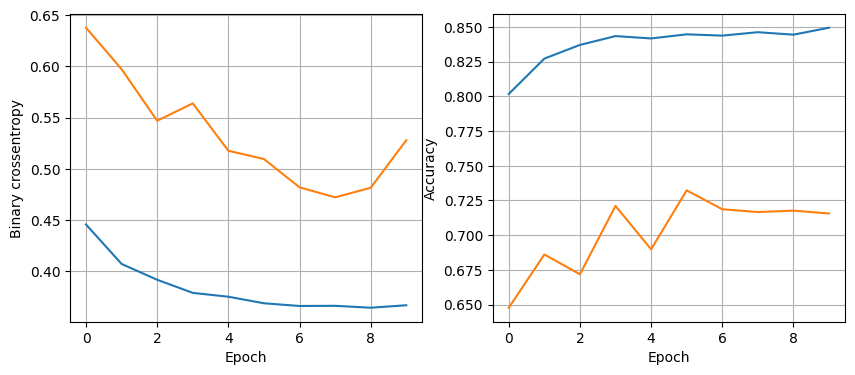

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.01, batch size 64


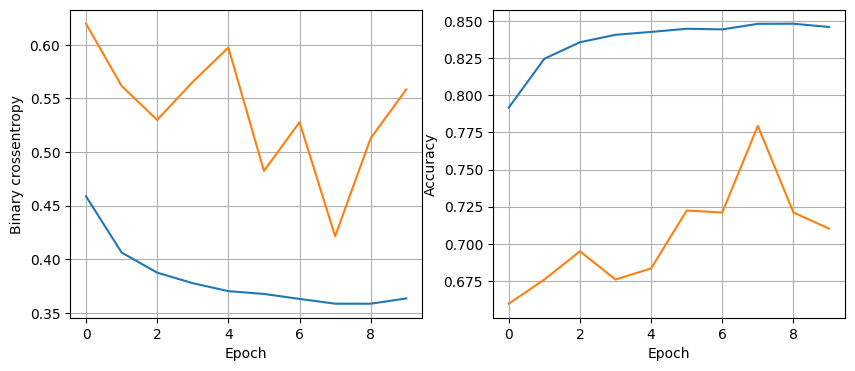

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.01, batch size 128


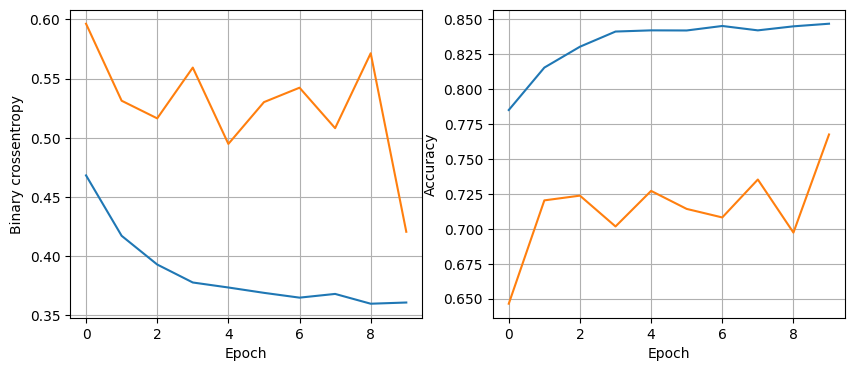

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.005, batch size 32


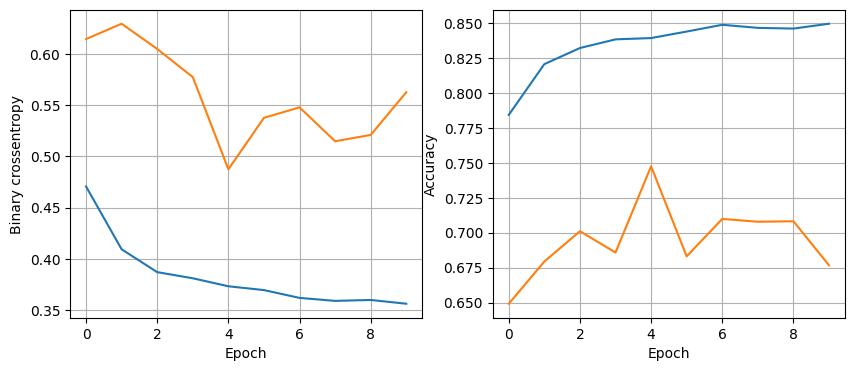

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8604
16 nodes, dropout 0.2, lr 0.005, batch size 64


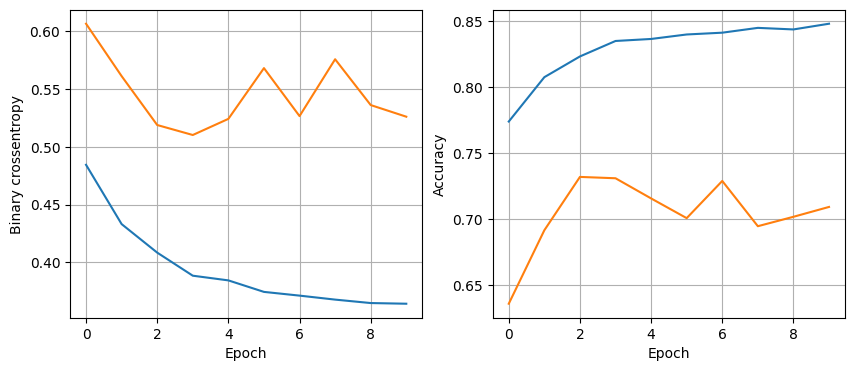

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.005, batch size 128


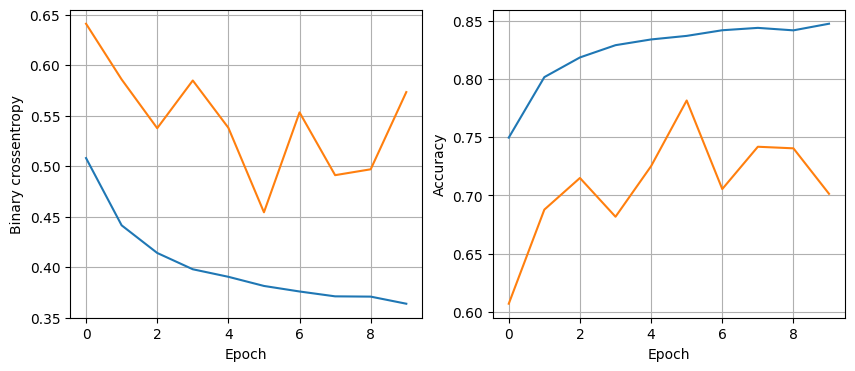

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.001, batch size 32


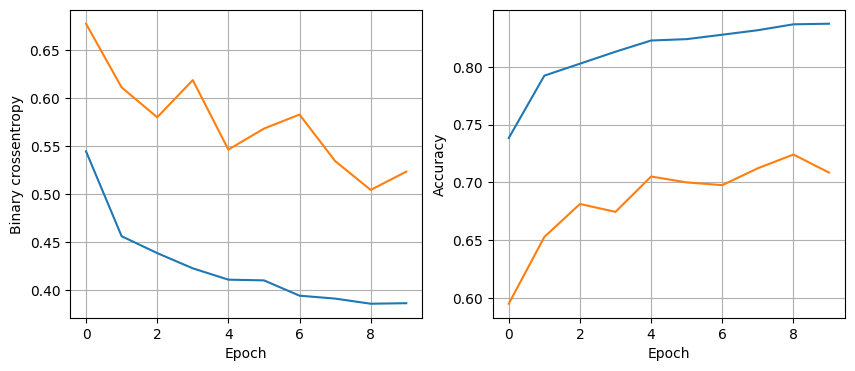

119/119 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8607
16 nodes, dropout 0.2, lr 0.001, batch size 64


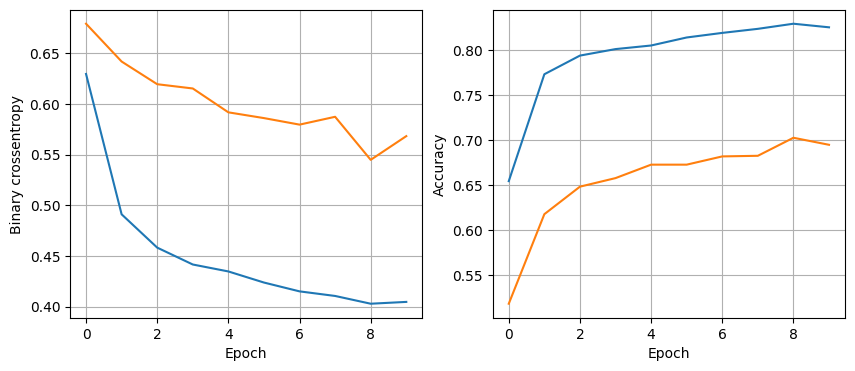

119/119 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.8507
16 nodes, dropout 0.2, lr 0.001, batch size 128


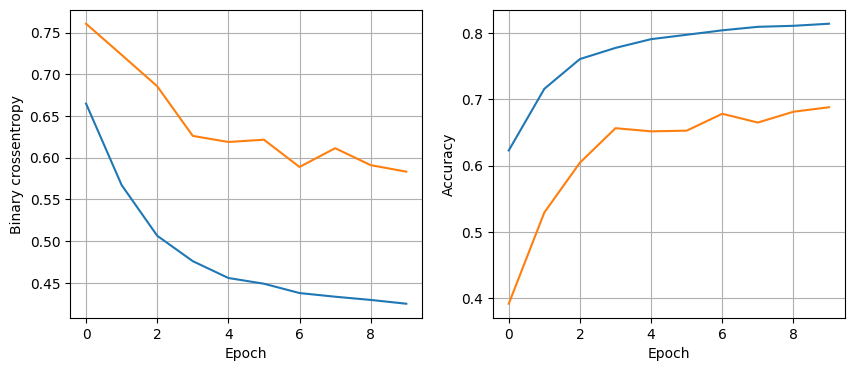

119/119 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8407
32 nodes, dropout 0, lr 0.01, batch size 32


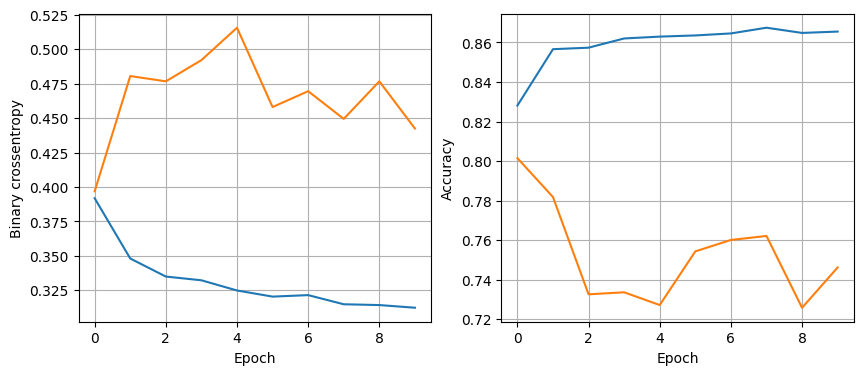

119/119 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.01, batch size 64


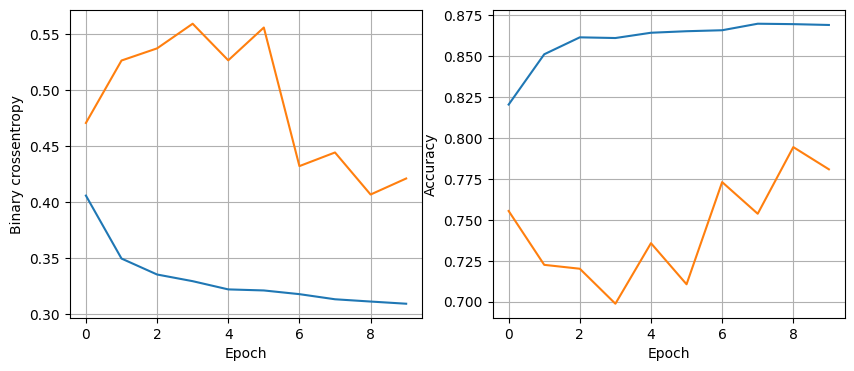

119/119 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.01, batch size 128


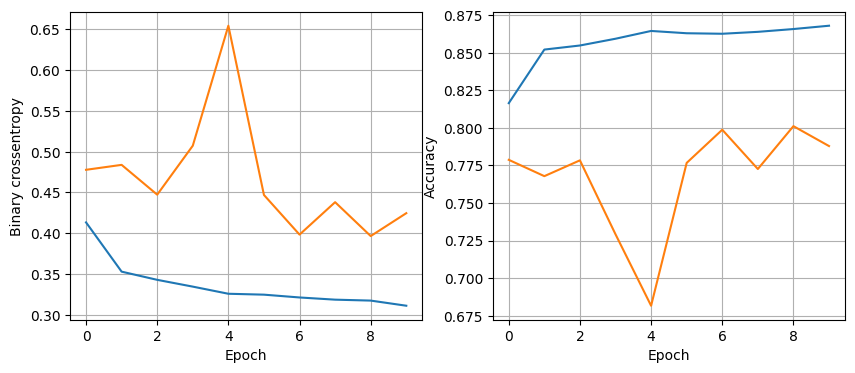

119/119 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8707
32 nodes, dropout 0, lr 0.005, batch size 32


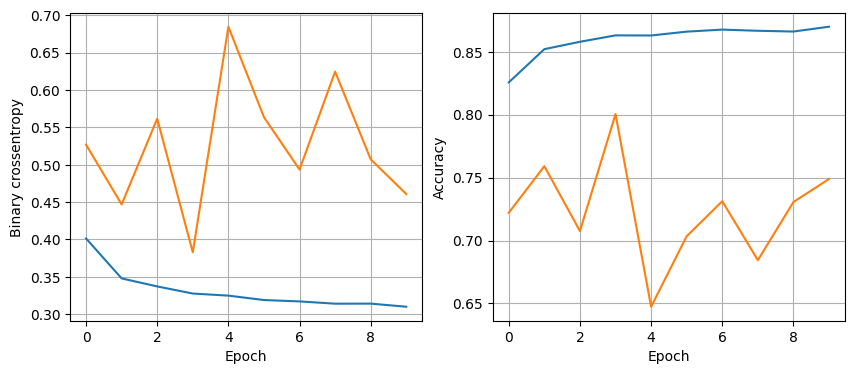

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.005, batch size 64


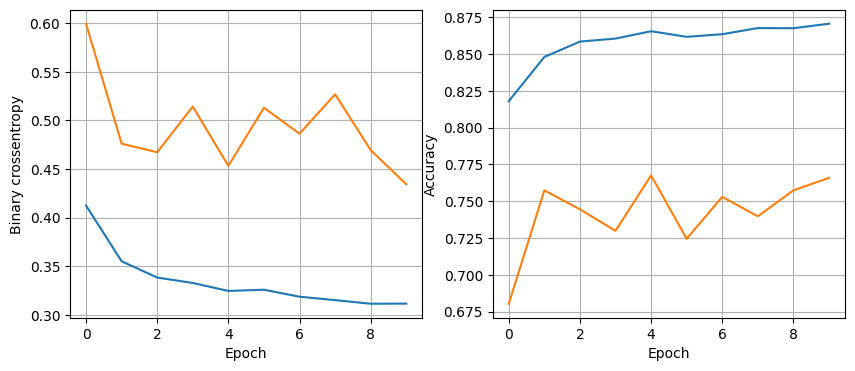

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8741
32 nodes, dropout 0, lr 0.005, batch size 128


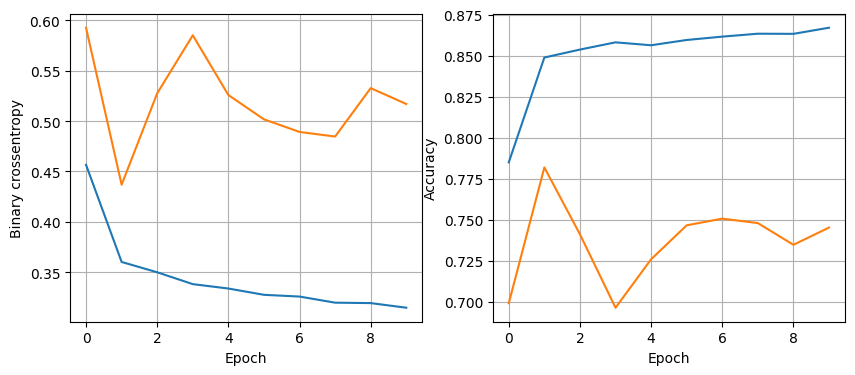

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8707
32 nodes, dropout 0, lr 0.001, batch size 32


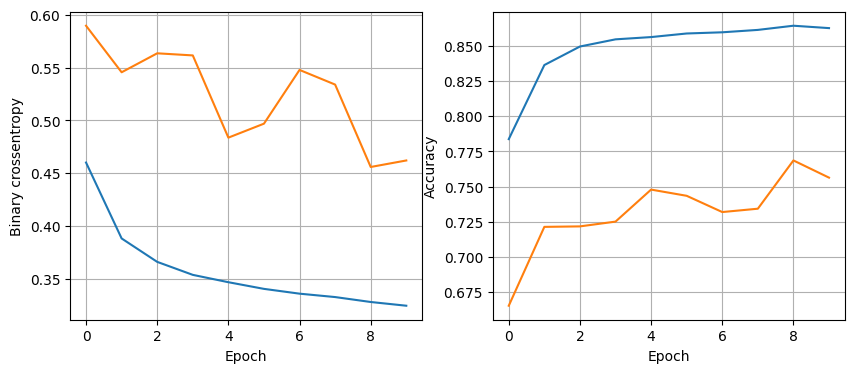

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.001, batch size 64


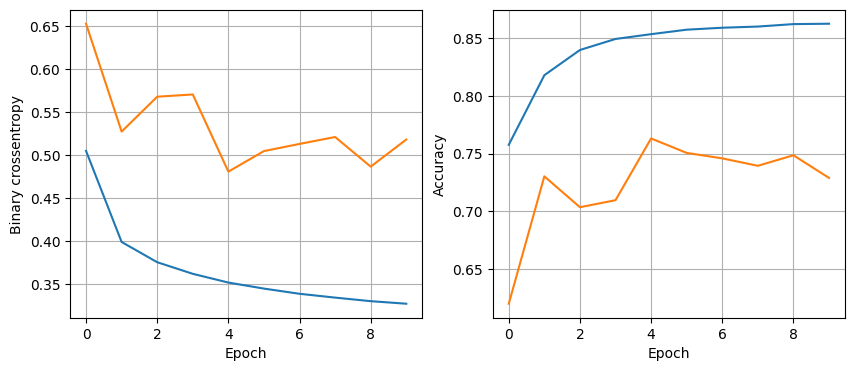

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8741
32 nodes, dropout 0, lr 0.001, batch size 128


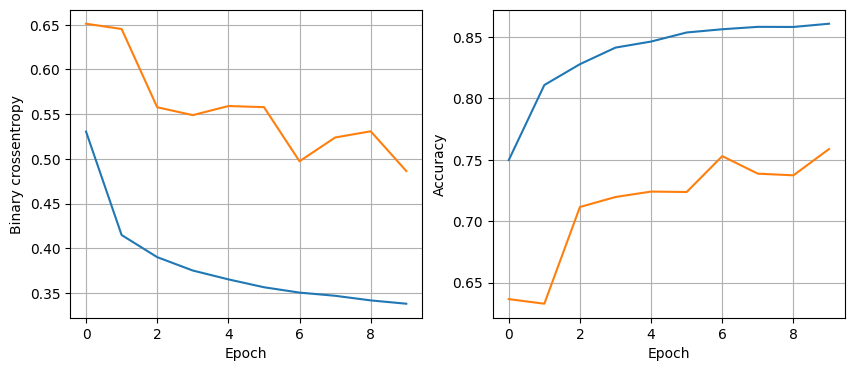

119/119 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8678
32 nodes, dropout 0.2, lr 0.01, batch size 32


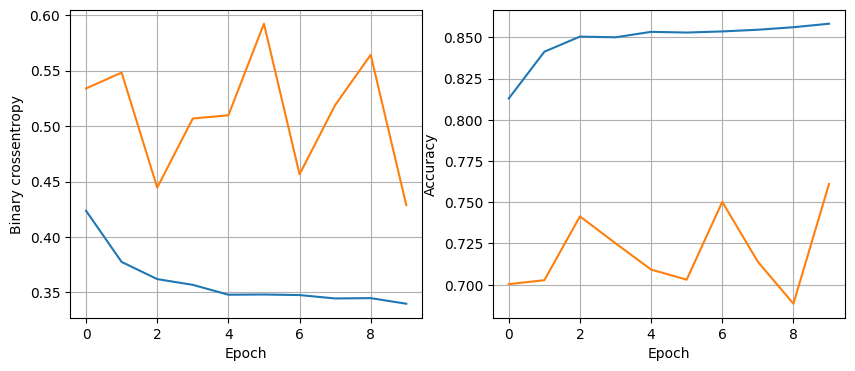

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.01, batch size 64


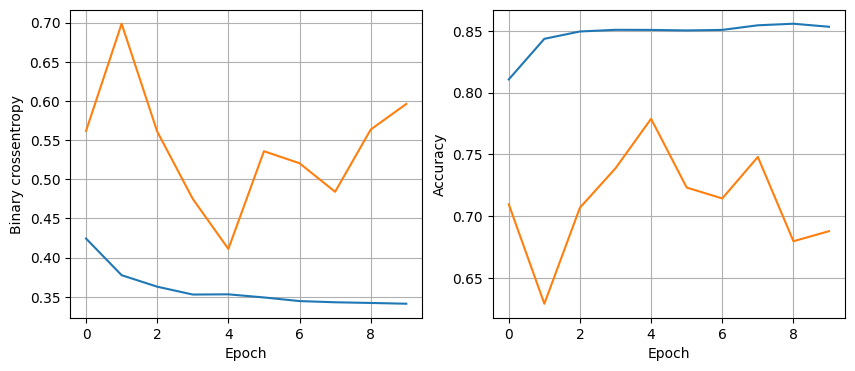

119/119 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8651
32 nodes, dropout 0.2, lr 0.01, batch size 128


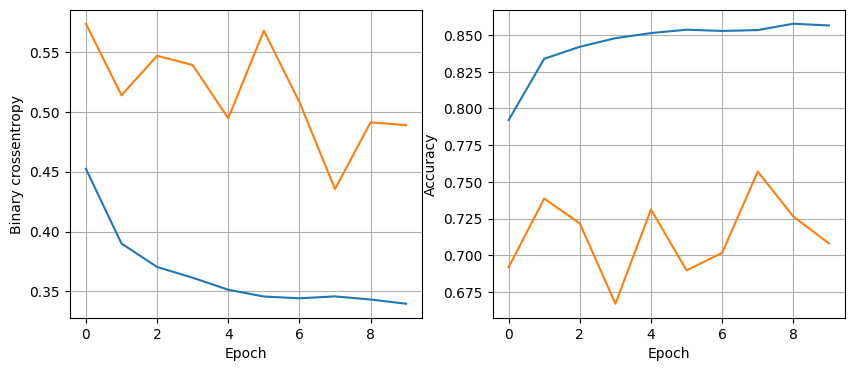

119/119 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.005, batch size 32


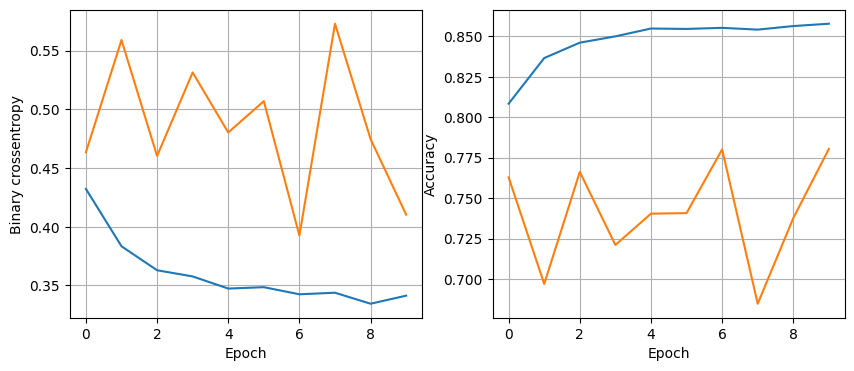

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.005, batch size 64


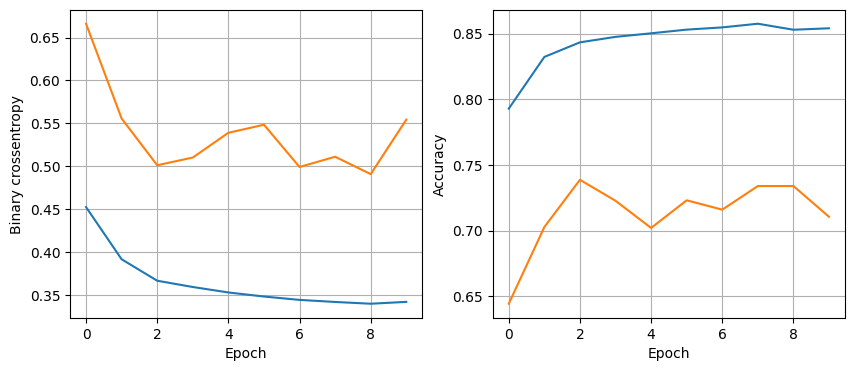

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8678
32 nodes, dropout 0.2, lr 0.005, batch size 128


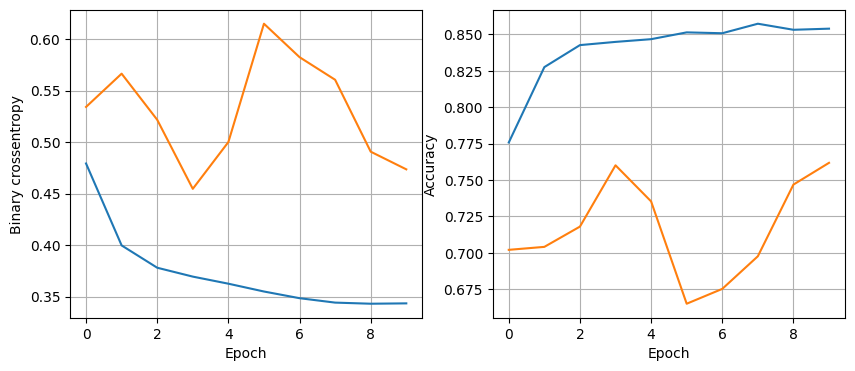

119/119 [==============================] - 1s 4ms/step - loss: 0.3143 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.001, batch size 32


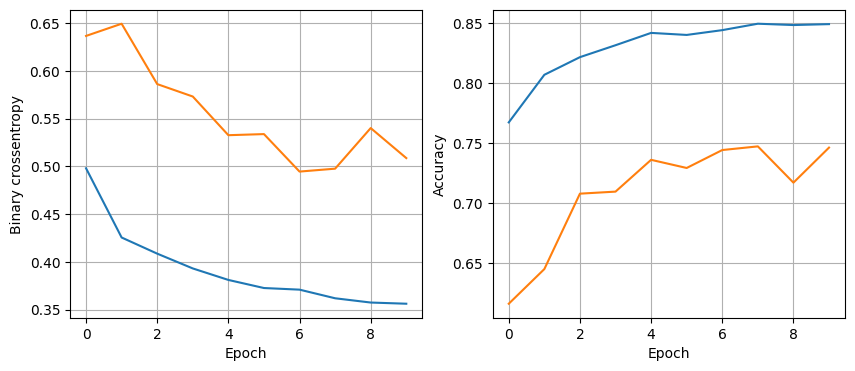

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.001, batch size 64


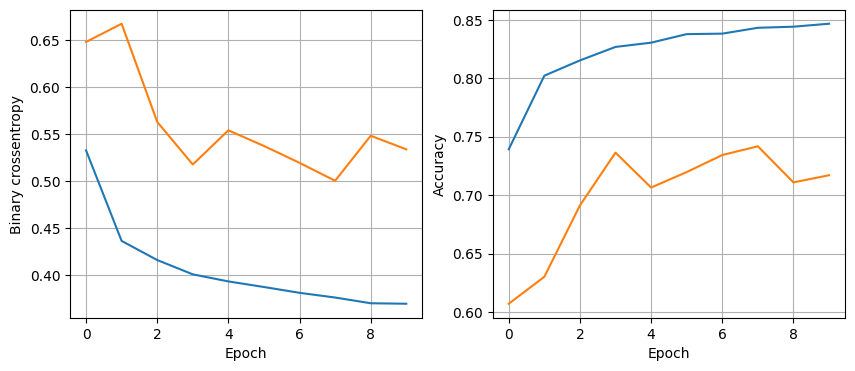

119/119 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.001, batch size 128


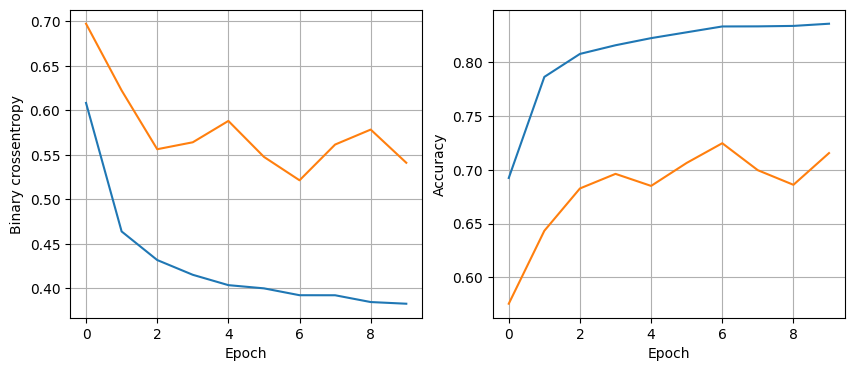

119/119 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8617
64 nodes, dropout 0, lr 0.01, batch size 32


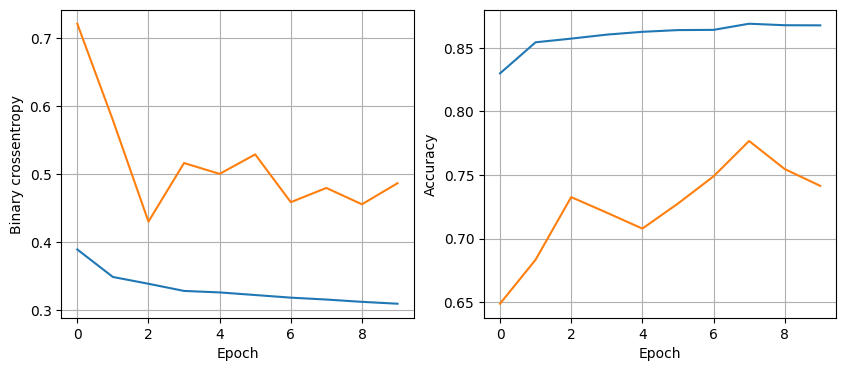

119/119 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8707
64 nodes, dropout 0, lr 0.01, batch size 64


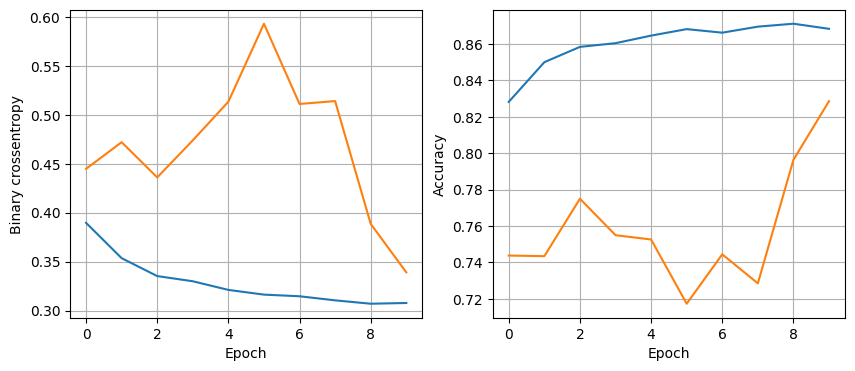

119/119 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.01, batch size 128


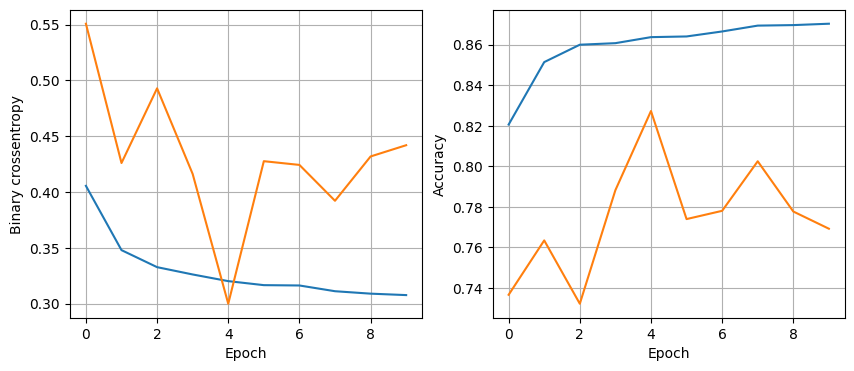

119/119 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8704
64 nodes, dropout 0, lr 0.005, batch size 32


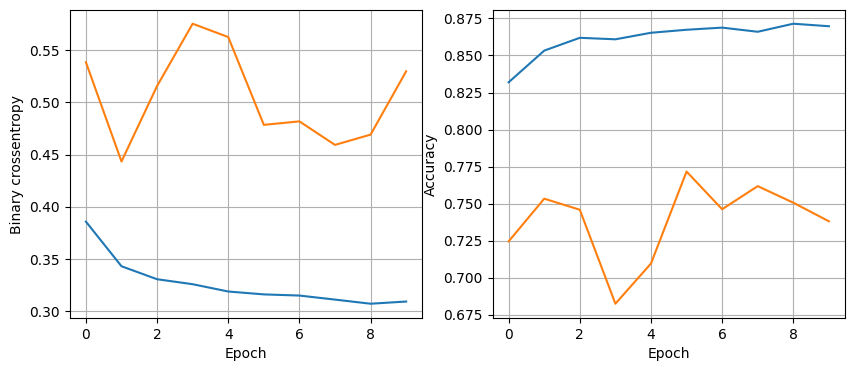

119/119 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8722
64 nodes, dropout 0, lr 0.005, batch size 64


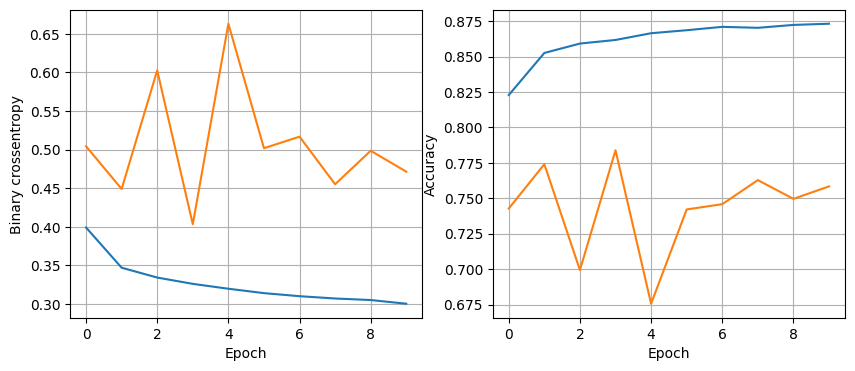

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8767
64 nodes, dropout 0, lr 0.005, batch size 128


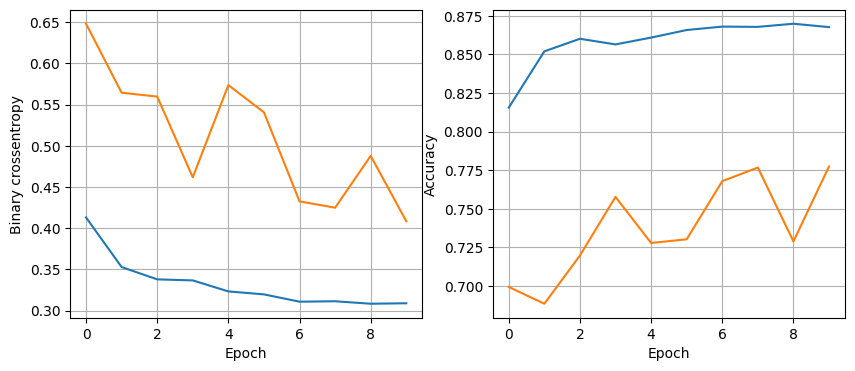

119/119 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8728
64 nodes, dropout 0, lr 0.001, batch size 32


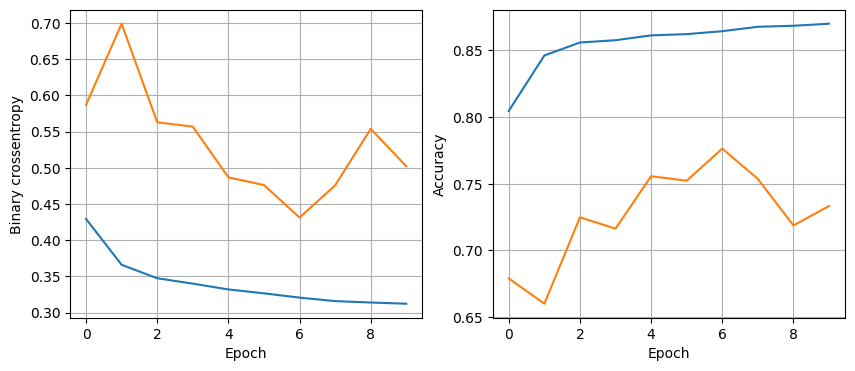

119/119 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.001, batch size 64


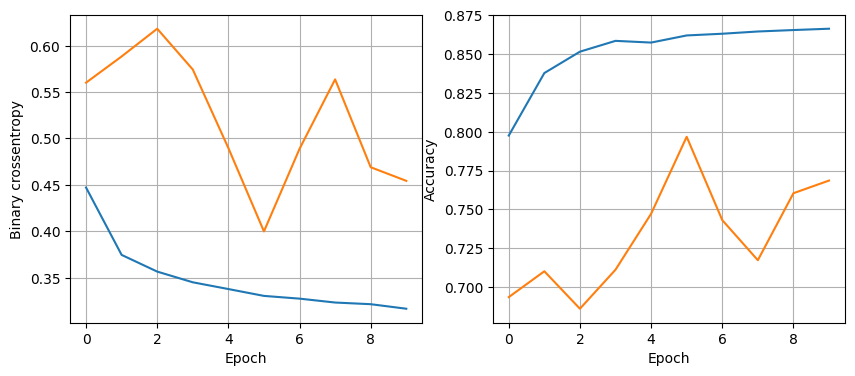

119/119 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.001, batch size 128


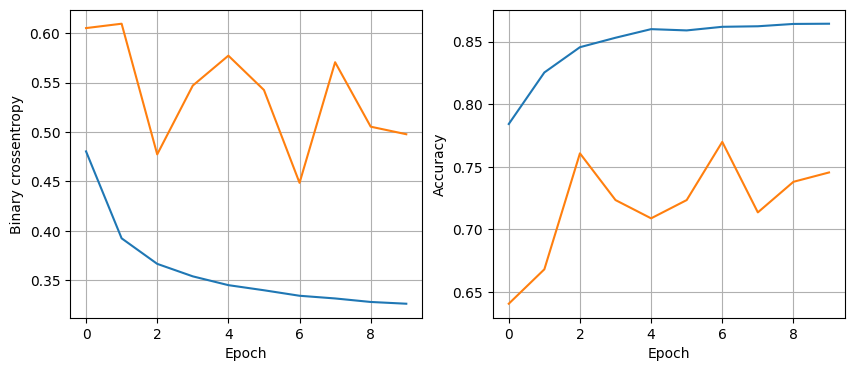

119/119 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8733
64 nodes, dropout 0.2, lr 0.01, batch size 32


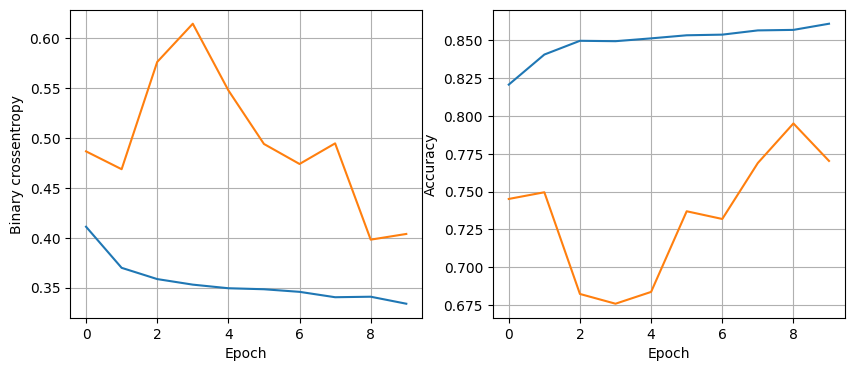

119/119 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.01, batch size 64


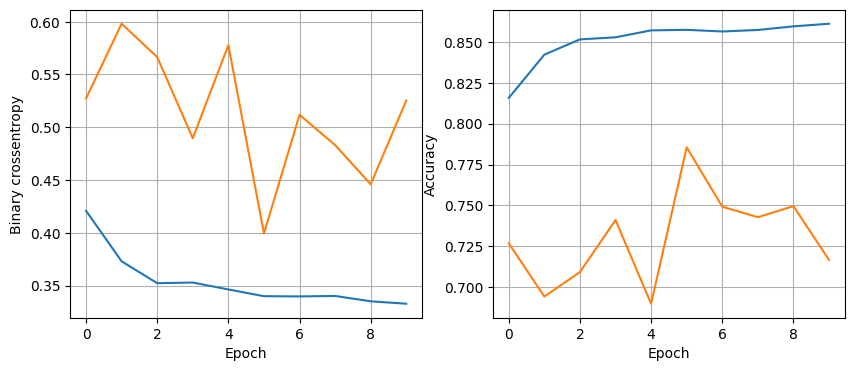

119/119 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8691
64 nodes, dropout 0.2, lr 0.01, batch size 128


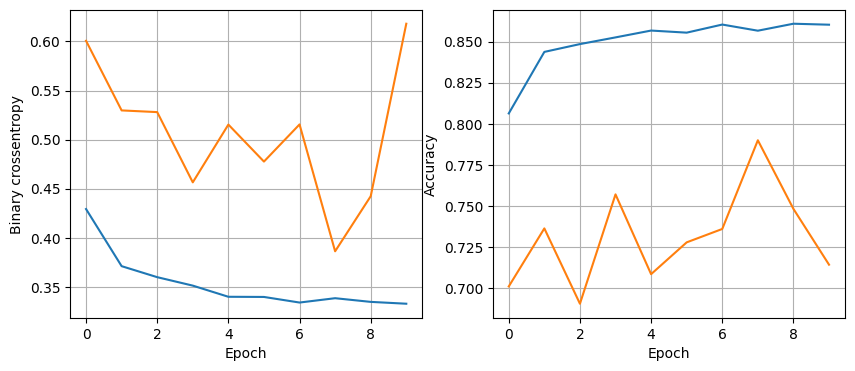

119/119 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8667
64 nodes, dropout 0.2, lr 0.005, batch size 32


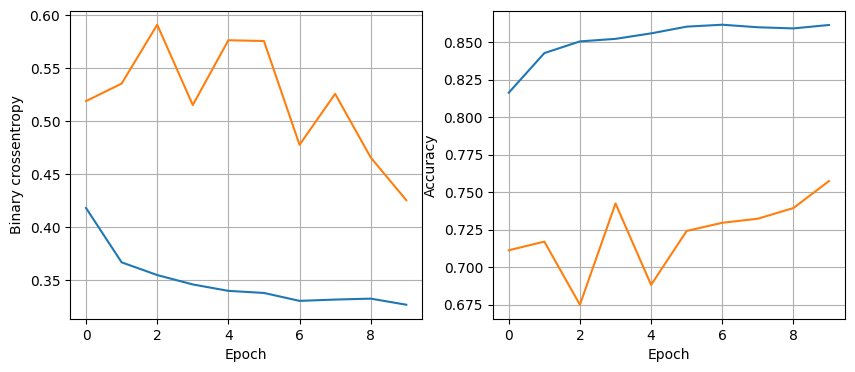

119/119 [==============================] - 1s 5ms/step - loss: 0.3087 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.005, batch size 64


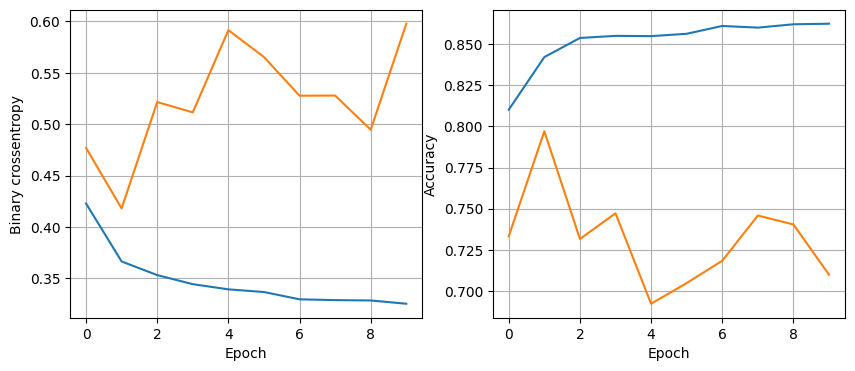

119/119 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8699
64 nodes, dropout 0.2, lr 0.005, batch size 128


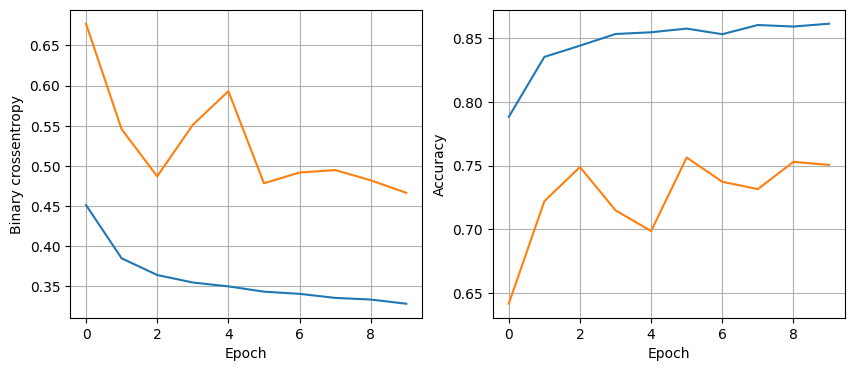

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.001, batch size 32


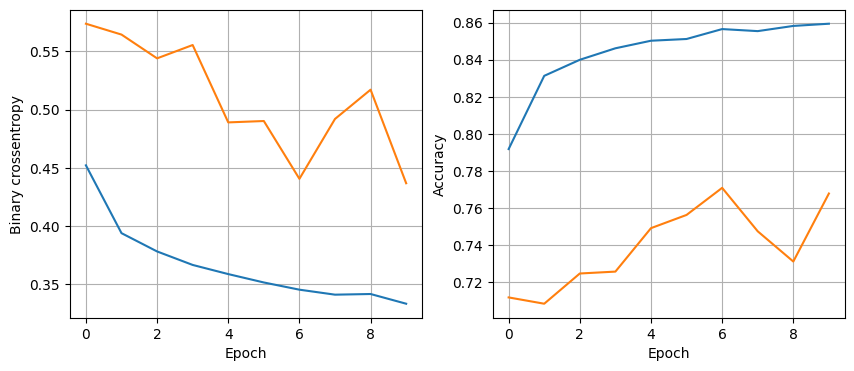

119/119 [==============================] - 0s 4ms/step - loss: 0.3112 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.001, batch size 64


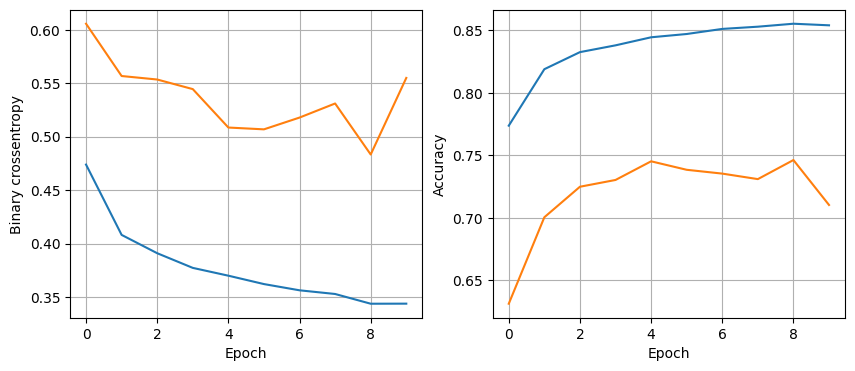

119/119 [==============================] - 1s 4ms/step - loss: 0.3138 - accuracy: 0.8717
64 nodes, dropout 0.2, lr 0.001, batch size 128


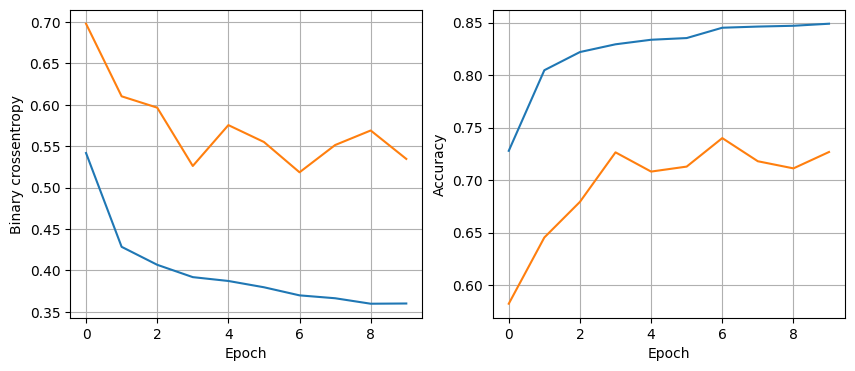

119/119 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8680


In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [36]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1326
           1       0.86      0.96      0.91      2478

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.85      3804
weighted avg       0.88      0.87      0.87      3804

